# ***PROYEK PERTAMA MACHINE LEARNING TERAPAN***
## **"Diabetes Prediction"**
Oleh: Putri Sinta Dewi Sinaga

Download dataset from Kaggle

In [1]:
# install kaggle package
!pip install -q kaggle

In [2]:
# upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"putrisinaga","key":"6c78d4e13fc440dcd954727a7df8589a"}'}

In [3]:
# make directory and change permission
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
# download dataset, choose 'copy api command' from kaggle dataset
!kaggle datasets download -d iammustafatz/diabetes-prediction-dataset

100% 734k/734k [00:00<00:00, 1.00MB/s]
100% 734k/734k [00:00<00:00, 1.00MB/s]


In [5]:
# unzip
!mkdir diabetes-prediction-dataset
!unzip diabetes-prediction-dataset.zip -d diabetes-prediction-dataset
!ls diabetes-prediction-dataset

Archive:  diabetes-prediction-dataset.zip
  inflating: diabetes-prediction-dataset/diabetes_prediction_dataset.csv  
diabetes_prediction_dataset.csv


In [6]:
# library
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

from imblearn.over_sampling import SMOTE #oversampling
from sklearn.preprocessing import StandardScaler #scaling
from sklearn.model_selection import train_test_split #splitting
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# machine learning
from sklearn.svm import SVC #Support Vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN

from sklearn.metrics import accuracy_score #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import classification_report #report
from sklearn.impute import SimpleImputer

# ignore all future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Importing the dataset

In [7]:
# read_csv
df = pd.read_csv('/content/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Analysis of dataset

In [8]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


analysis for Gender Column

In [9]:
df['gender'].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [10]:
# Label Encoding for gender column
label_encoder = preprocessing.LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,No Info,27.32,6.2,90,0
99996,0,2.0,0,0,No Info,17.37,6.5,100,0
99997,1,66.0,0,0,former,27.83,5.7,155,0
99998,0,24.0,0,0,never,35.42,4.0,100,0


Analysis for Smoking History

In [11]:
df['smoking_history'].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [12]:
# Convert smoking history to numerical format
smoking_history_mapping = {'not current' : 4 , 'former' : 2 , 'No Info' : 0 , 'current' : 3 , 'never' : 1 , 'ever' : 5}
df['smoking_history'] = df['smoking_history'].map(smoking_history_mapping)

In [13]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,1,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,1,27.32,5.7,158,0
3,0,36.0,0,0,3,23.45,5.0,155,0
4,1,76.0,1,1,3,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,2,27.83,5.7,155,0
99998,0,24.0,0,0,1,35.42,4.0,100,0


In [14]:
df.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.414660,41.885856,0.07485,0.039420,1.27465,27.320767,5.527507,138.058060,0.085000
std,0.493031,22.516840,0.26315,0.194593,1.40306,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.080000,0.00000,0.000000,0.00000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.00000,0.000000,0.00000,23.630000,4.800000,100.000000,0.000000
50%,0.000000,43.000000,0.00000,0.000000,1.00000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,60.000000,0.00000,0.000000,2.00000,29.580000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.00000,1.000000,5.00000,95.690000,9.000000,300.000000,1.000000


Analysis for Age column

<Axes: >

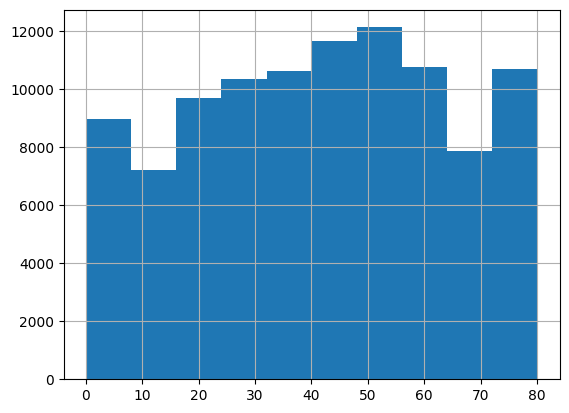

In [15]:
df['age'].hist()

In [16]:
df = df[df['age'].mod(1) == 0]
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,1,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,1,27.32,5.7,158,0
3,0,36.0,0,0,3,23.45,5.0,155,0
4,1,76.0,1,1,3,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,2,27.83,5.7,155,0
99998,0,24.0,0,0,1,35.42,4.0,100,0


In [17]:
# convert age column datatype to int
df['age'] = df['age'].astype(int)
df.head()

<ipython-input-17-d378338dccc5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].astype(int)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,1,25.19,6.6,140,0
1,0,54,0,0,0,27.32,6.6,80,0
2,1,28,0,0,1,27.32,5.7,158,0
3,0,36,0,0,3,23.45,5.0,155,0
4,1,76,1,1,3,20.14,4.8,155,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97982 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               97982 non-null  int64  
 1   age                  97982 non-null  int64  
 2   hypertension         97982 non-null  int64  
 3   heart_disease        97982 non-null  int64  
 4   smoking_history      97982 non-null  int64  
 5   bmi                  97982 non-null  float64
 6   HbA1c_level          97982 non-null  float64
 7   blood_glucose_level  97982 non-null  int64  
 8   diabetes             97982 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 7.5 MB


**Data Cleaning**

proses mendeteksi dan mengoreksi (atau menghapus) catatan yang rusak atau tidak akurat dari kumpulan catatan, tabel, atau basis data dan mengacu pada pengidentifikasian bagian data yang tidak lengkap, salah, tidak akurat atau tidak relevan dan kemudian mengganti, memodifikasi, atau menghapus data kotor atau kasar.

In [19]:
df.nunique()

gender                    3
age                      80
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4198
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [20]:
# check missing values
(df.isnull() | df.empty | df.isna()).sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [21]:
# check duplicates data
df.duplicated().sum()

3849

In [22]:
# remove duplicates data
df.drop_duplicates(inplace=True)
if df.duplicated().sum() == 0:
  print('no duplicate instances')

no duplicate instances


<ipython-input-22-7b497bd86e23>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [23]:
# check dimensionality
df.shape

(94133, 9)

In [24]:
# descriptive statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gender,94133.0,0.414042,0.492946,0.00,0.00,0.00,1.00,2.00
age,94133.0,42.665569,21.888652,1.00,25.00,44.00,60.00,80.00
hypertension,94133.0,0.079260,0.270146,0.00,0.00,0.00,0.00,1.00
heart_disease,94133.0,0.041675,0.199847,0.00,0.00,0.00,0.00,1.00
smoking_history,94133.0,1.336704,1.411504,0.00,0.00,1.00,2.00,5.00
bmi,94133.0,27.522871,6.671336,10.01,23.71,27.32,29.99,95.69
HbA1c_level,94133.0,5.535810,1.075038,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,94133.0,138.325571,41.040439,80.00,100.00,140.00,159.00,300.00
diabetes,94133.0,0.090107,0.286336,0.00,0.00,0.00,0.00,1.00


Pada proses cleansing data, dataset yang digunakan memiliki duplikasi data sebanyak 3849 data. duplikasi ini harus dihilangkan untuk mencegah ketidakuratan model dalam melakukan prediksi. data yang terduplikasi memang cukup banyak tetapi masih bisa dipakai karena masih terdapat 94133 data untuk digunakan.

**Exploratory Data Analysis**

Exploratory Data Analysis adalah suatu proses uji investigasi awal yang bertujuan untuk mengidentifikasi pola, menemukan anomali, menguji hipotesis dan memeriksa asumsi. Proses EDA ini sangat bermanfaat dalam proses analisis statistik.

In [25]:
# convert numerical to categorical
def categorization(data):
  df.astype({'gender': 'object'},{'diabetes': 'object'})
  df.replace(to_replace={'gender': {0:'Male', 1:'Female'},
      'diabetes': {0:'Not Diabetes', 1:'Diabetes'}}, inplace=True)
  return df

In [26]:
# apply to datasets
categorization(df)

<ipython-input-25-6a712cfbe217>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(to_replace={'gender': {0:'Male', 1:'Female'},


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Male,80,0,1,1,25.19,6.6,140,Not Diabetes
1,Male,54,0,0,0,27.32,6.6,80,Not Diabetes
2,Female,28,0,0,1,27.32,5.7,158,Not Diabetes
3,Male,36,0,0,3,23.45,5.0,155,Not Diabetes
4,Female,76,1,1,3,20.14,4.8,155,Not Diabetes
...,...,...,...,...,...,...,...,...,...
99994,Male,36,0,0,0,24.60,4.8,145,Not Diabetes
99996,Male,2,0,0,0,17.37,6.5,100,Not Diabetes
99997,Female,66,0,0,2,27.83,5.7,155,Not Diabetes
99998,Male,24,0,0,1,35.42,4.0,100,Not Diabetes


**Univariate Analysis**

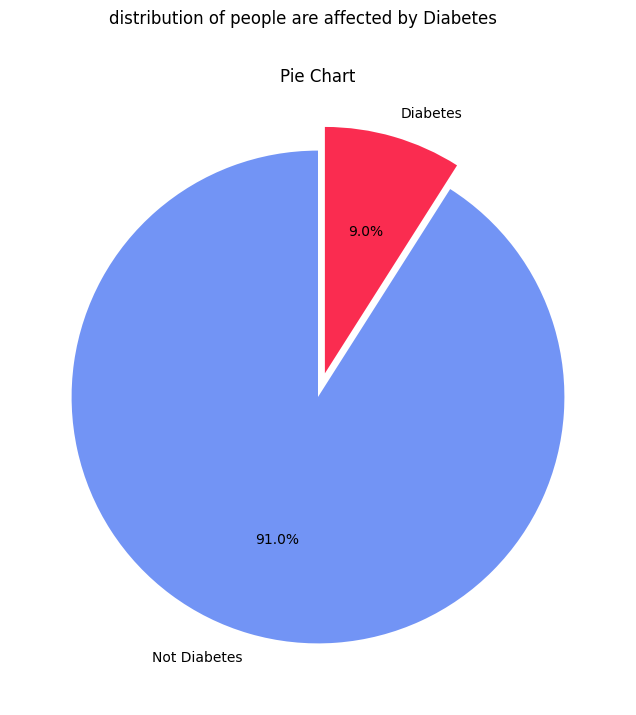

<Figure size 640x480 with 0 Axes>

In [27]:
# set canvas
plt.figure(figsize=(12,8))

# visualize pie plot
df['diabetes'].value_counts().plot.pie(explode=[0, 0.1], 
                                     autopct='%1.1f%%', 
                                     colors=['#7294f5','#fa2c50'], 
                                     startangle = 90, 
                                     shadow=False)
plt.title('Pie Chart')
plt.ylabel('')

plt.suptitle('distribution of people are affected by Diabetes')
# plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.show()
plt.savefig('foo.png')

Pada Pie Chart, dapat disimpulkan bahwa pengidap Diabetes lebih sedikit daripada orang yang tidak mengidap anemia yaitu sebesar 9.0%

**Coorelation *Body Mass Index* (BMI)**

<Axes: xlabel='gender', ylabel='bmi'>

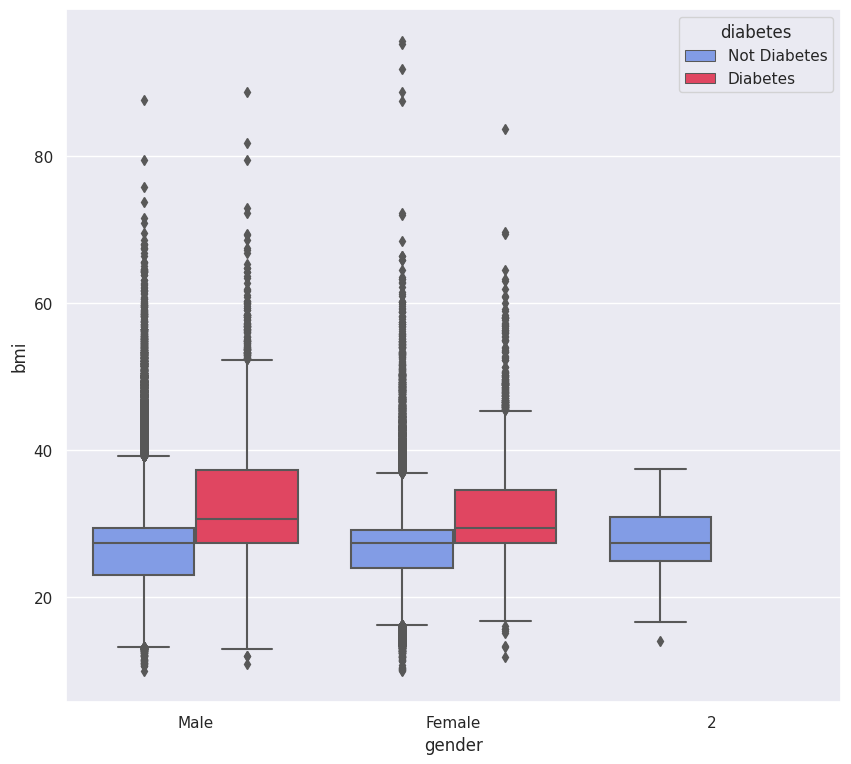

In [28]:
sns.set(rc = {'figure.figsize':(10,9)})
sns.boxplot(x='gender',y='bmi', hue='diabetes', palette={"Not Diabetes": "#7294f5", "Diabetes": "#fa2c50"}, data=df)

Pada visualisasi diatas, Orang yang terkena Diabetes, cenderung memiliki Body Mass Index yang lebih besar

<Axes: xlabel='diabetes', ylabel='age'>

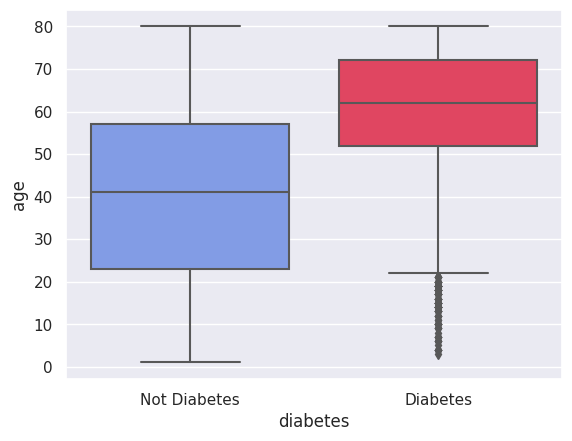

In [29]:
sns.set(rc = {'figure.figsize':(6.4,4.8)})
sns.boxplot(y='age', x='diabetes', palette={"Not Diabetes": "#7294f5", "Diabetes": "#fa2c50"}, data=df)

<Axes: xlabel='diabetes', ylabel='HbA1c_level'>

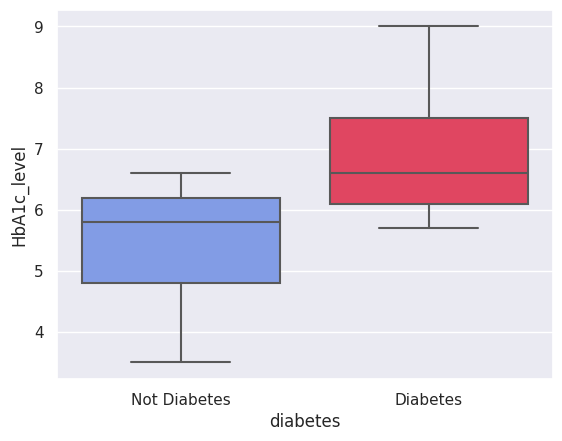

In [30]:
sns.set(rc = {'figure.figsize':(6.4,4.8)})
sns.boxplot(y='HbA1c_level', x='diabetes', palette={"Not Diabetes": "#7294f5", "Diabetes": "#fa2c50"}, data=df)

<Axes: xlabel='diabetes', ylabel='blood_glucose_level'>

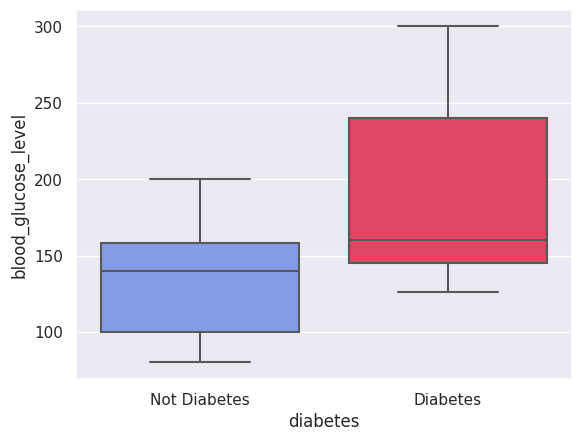

In [31]:
sns.set(rc = {'figure.figsize':(6.4,4.8)})
sns.boxplot(y='blood_glucose_level', x='diabetes', palette={"Not Diabetes": "#7294f5", "Diabetes": "#fa2c50"}, data=df)

dari tiga visualiasi diatas, tidak ada perbedaan yang signifikan ditemukan.

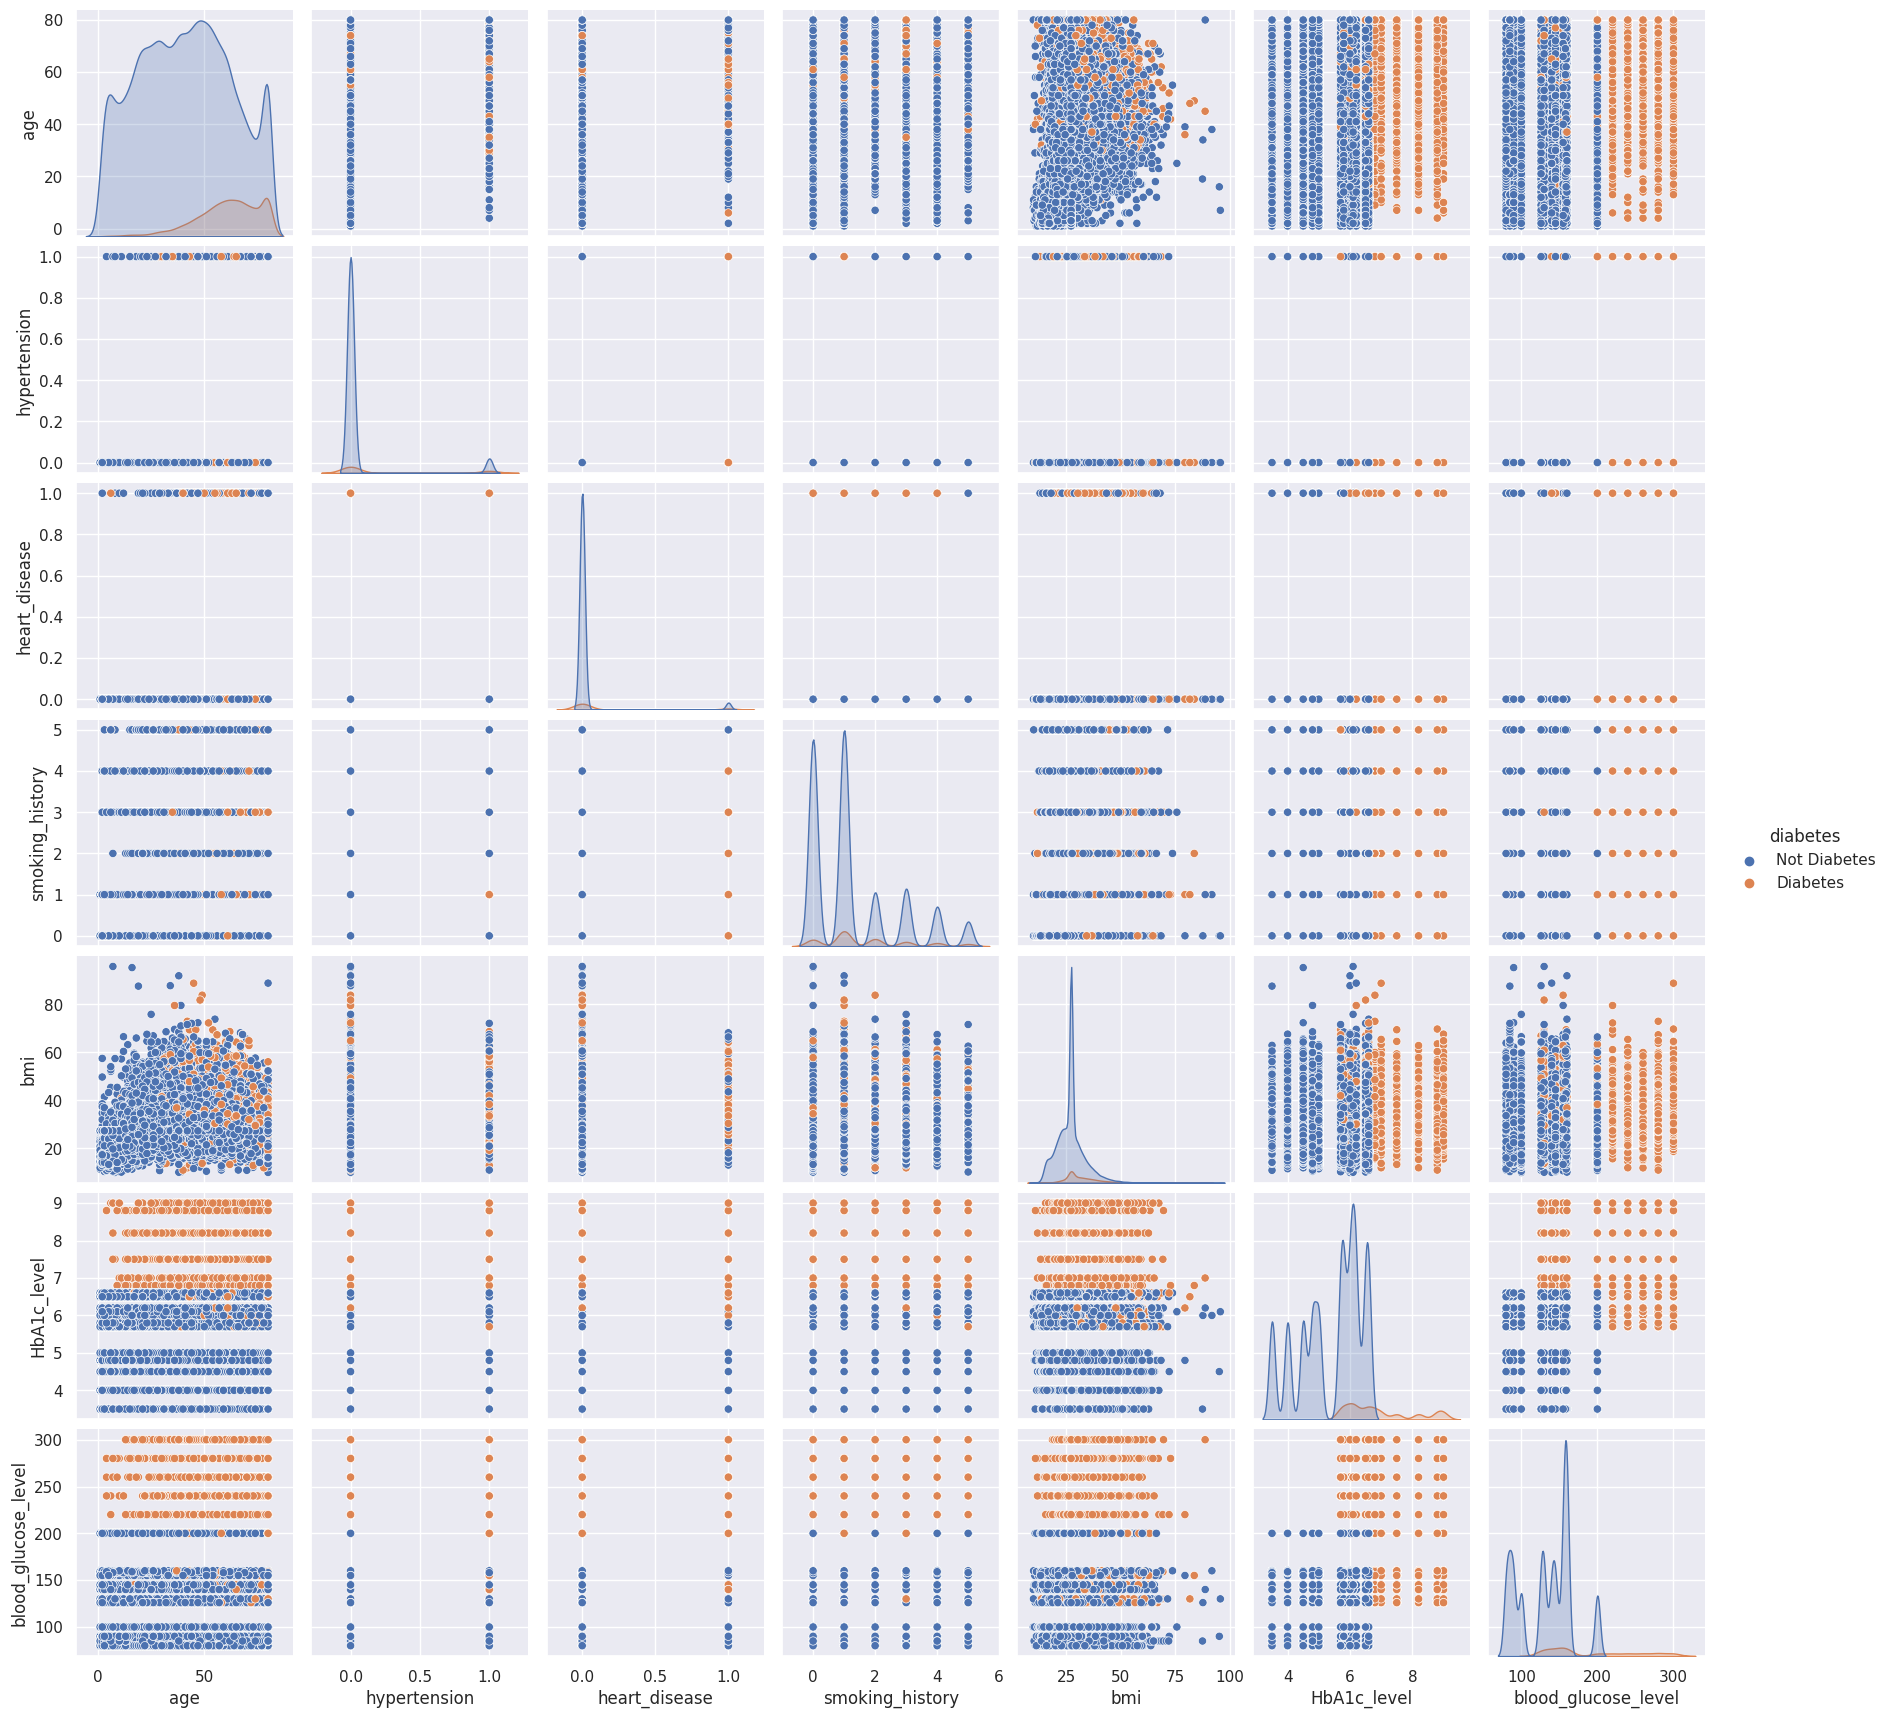

In [32]:
# pairplot
sns.pairplot(df, hue="diabetes")

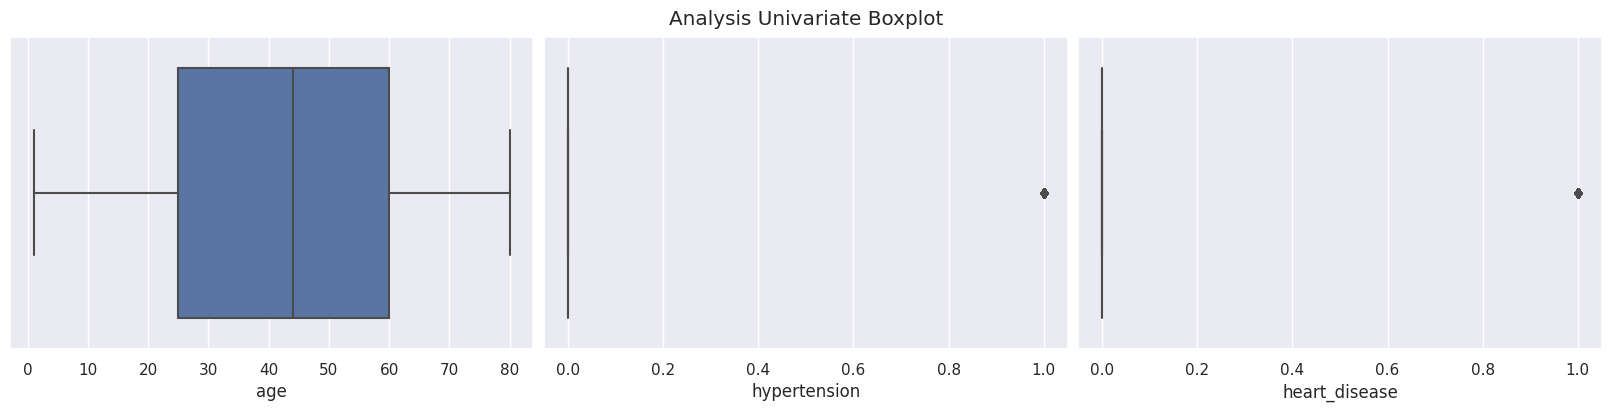

In [33]:
# boxplot
sns.set_theme()
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4), constrained_layout=True)
plt.suptitle("Analysis Univariate Boxplot")
ax = ax.flatten()
colbox = df.iloc[:, 1:4]
for i, j in enumerate(colbox):
    sns.boxplot(x=df[j], ax=ax[i])

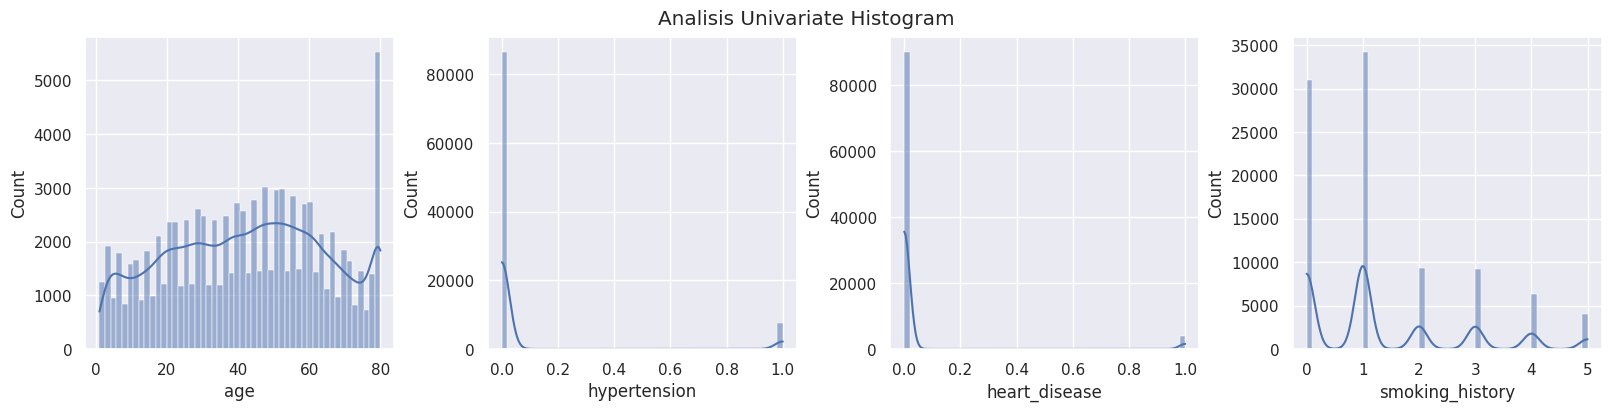

In [34]:
# histplot
fig, ax = plt.subplots(nrows=1,ncols=4, figsize=(16,4), constrained_layout=True)
plt.suptitle("Analisis Univariate Histogram")
ax=ax.flatten()
colhist = df.iloc[:, 1:5]
for i, j in enumerate(colhist):
    sns.histplot(df[j], ax=ax[i], kde=True, bins=50)

**Data Preparation**

satu langkah awal dalam Machine Learning untuk mempersiapkan data.

In [35]:
# inverse to numerical
def inverse_categorization(data):
  df.replace(to_replace={'gender': {'Male':0, 'Female':1},
                         'diabetes': {'Not Diabetes':0, 'Diabetes':1}}, inplace=True)
  df.astype({'gender': 'int64'}, {'diabetes': 'int64'})
  return df

In [36]:
# apply to datasets
inverse_categorization(df)

<ipython-input-35-e502ac51d63d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(to_replace={'gender': {'Male':0, 'Female':1},


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,1,25.19,6.6,140,0
1,0,54,0,0,0,27.32,6.6,80,0
2,1,28,0,0,1,27.32,5.7,158,0
3,0,36,0,0,3,23.45,5.0,155,0
4,1,76,1,1,3,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36,0,0,0,24.60,4.8,145,0
99996,0,2,0,0,0,17.37,6.5,100,0
99997,1,66,0,0,2,27.83,5.7,155,0
99998,0,24,0,0,1,35.42,4.0,100,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94133 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               94133 non-null  int64  
 1   age                  94133 non-null  int64  
 2   hypertension         94133 non-null  int64  
 3   heart_disease        94133 non-null  int64  
 4   smoking_history      94133 non-null  int64  
 5   bmi                  94133 non-null  float64
 6   HbA1c_level          94133 non-null  float64
 7   blood_glucose_level  94133 non-null  int64  
 8   diabetes             94133 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 7.2 MB


**Train-Test Split**


 salah satu metode yang dapat digunakan untuk mengevaluasi performa model machine learning. Metode evaluasi model ini membagi dataset menjadi dua bagian yakni bagian yang digunakan untuk training data dan untuk testing data dengan proporsi tertentu. pada case ini, dataset akan dibagi dengan proporsi 20% yang akan digunakan sebagai data test. variabel X merupakan variabel untuk menampung attribut dan variabel y untuk menampung nilai class.

In [38]:
# define x and y
X = df.drop('diabetes', axis=1).values
Y = df['diabetes'].values

Train data digunakan untuk fit model machine learning, sedangkan test data digunakan untuk mengevaluasi hasil fit model tersebut

In [39]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

print('X_train: {} records data'.format(len(X_train)))
print('y_train: {} records data'.format(len(y_train)))
print('X_test: {} records data'.format(len(X_test)))
print('y_test: {} records data'.format(len(y_test)))

X_train: 75306 records data
y_train: 75306 records data
X_test: 18827 records data
y_test: 18827 records data


Setelah melakukan splitting data, terdapat 75306 data yang akan digunakan sebagai data train (80%) dan 18827 data sebagai data testing (20%).

**Scaling Data**


bertujuan untuk menyeragamkan data agar sesuai dengan skala yang diinginkan. scaler yang digunakan adalah StandardScaler.

In [40]:
# feature scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
# check scale data
X_train

array([[-0.83853458,  1.38484081,  3.39070007, ...,  1.97919104,
         0.62008453,  0.16280136],
       [ 1.19060055, -0.57883363, -0.29492435, ..., -0.02944675,
         0.43363542,  0.50439775],
       [ 1.19060055,  0.19750278, -0.29492435, ...,  0.02738738,
         0.89975819,  0.40679878],
       ...,
       [ 1.19060055,  0.6998381 , -0.29492435, ...,  0.16199453,
        -0.49861011, -0.20319478],
       [-0.83853458,  0.74550494,  3.39070007, ..., -1.04797417,
         0.24718632,  0.16280136],
       [-0.83853458, -0.167832  , -0.29492435, ...,  5.88728527,
         0.89975819, -0.30079375]])

In [42]:
X_test

array([[ 1.19060055,  0.6085044 , -0.29492435, ...,  0.38035724,
         0.15396176, -0.93518704],
       [-0.83853458, -0.167832  , -0.29492435, ..., -0.97618369,
        -0.49861011,  1.50478718],
       [-0.83853458,  1.15650657, -0.29492435, ..., -0.02944675,
        -0.68505922,  0.04080264],
       ...,
       [ 1.19060055, -0.98983525, -0.29492435, ..., -0.40933803,
        -0.49861011,  0.50439775],
       [-0.83853458, -0.80716786, -0.29492435, ...,  1.17902632,
         0.43363542, -0.93518704],
       [ 1.19060055, -1.26383634, -0.29492435, ..., -0.91785393,
         0.24718632, -0.20319478]])

**Imbalanced Classes**

Imbalance class merupakan kondisi dimana distribusi pada setiap label tidak seimbang. Hal ini, sangat umum ditemui dalam masalah pemodelan prediksi klasifikasi. perlu dilakukan penanganan terkait adanya kelas yang tidak seimbang. disini akan coba dilakukan handling menggunakan teknik oversampling meggunakan Synthetic Minority Oversampling Technique (SMOTE) adalah teknik statistik untuk meningkatkan data minoritas agar seimbang.

Text(0.5, 1.0, 'Perbandingan Class (Before)')

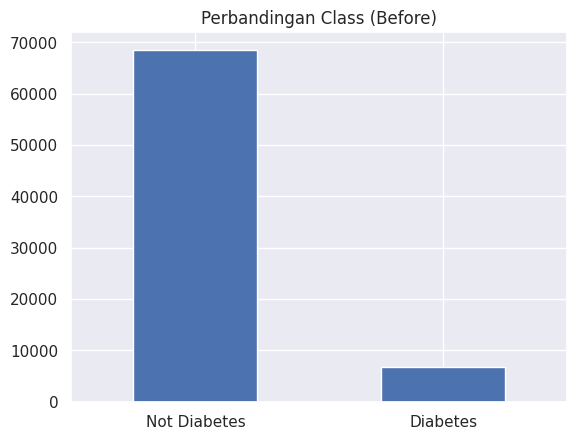

In [43]:
# imbalanced class
df_y_train = pd.DataFrame(y_train)
df_y_train.value_counts().plot(kind='bar')
plt.xticks([0,1],['Not Diabetes','Diabetes'], rotation=0)
plt.xlabel('')
plt.title('Perbandingan Class (Before)')

In [44]:
# smote oversampling
smote = SMOTE(sampling_strategy = 1)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

Text(0.5, 1.0, 'Perbandingan Class (After)')

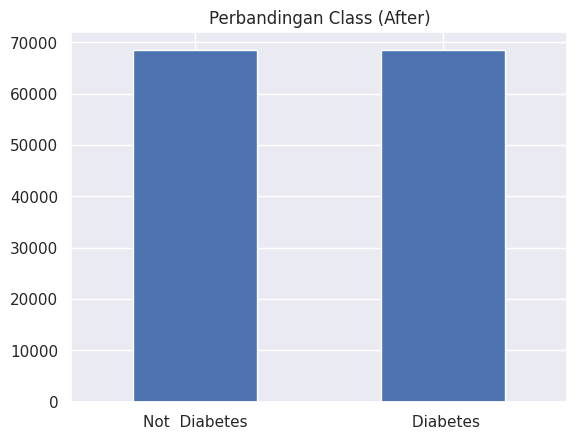

In [45]:
# check class
df_y_smote = pd.DataFrame(y_smote)
df_y_smote.value_counts().plot(kind='bar')
plt.xticks([0,1],['Not  Diabetes',' Diabetes'], rotation=0)
plt.xlabel('')
plt.title('Perbandingan Class (After)')

**Predictive Modelling**

In [46]:
# object model
modelKNN = KNeighborsClassifier(n_neighbors=8, metric='minkowski')
modelSVM = SVC(kernel='rbf')
modelRF = RandomForestClassifier(n_estimators=100)

# fitting
modelKNN.fit(X_smote, y_smote)
modelSVM.fit(X_smote, y_smote)
modelRF.fit(X_smote, y_smote)

# predict
y_predKNN = modelKNN.predict(X_test)
y_predSVM = modelSVM.predict(X_test)
y_predRF = modelRF.predict(X_test)

**Evaluation**

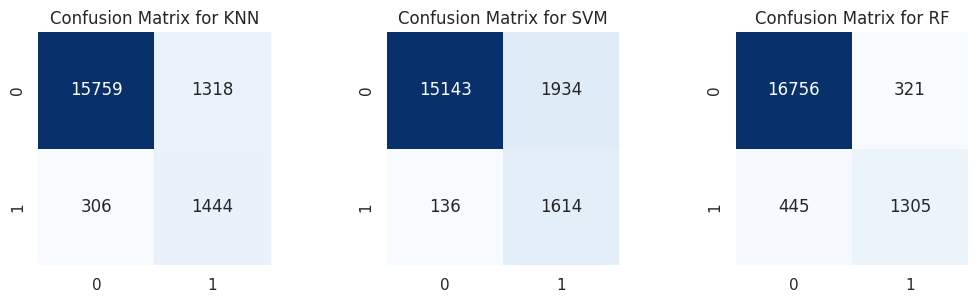

In [47]:
# conf-matrix
fig, ax = plt.subplots(nrows=1,ncols=3, figsize=(12,8))

conf_mat = confusion_matrix(y_test, y_predKNN)
sns.heatmap(conf_mat, ax=ax[0], square=True, annot=True, cmap='Blues', fmt='d', cbar=False)
ax[0].set_title('Confusion Matrix for KNN')

conf_mat = confusion_matrix(y_test, y_predSVM)
sns.heatmap(conf_mat, ax=ax[1], square=True, annot=True, cmap='Blues', fmt='d', cbar=False)
ax[1].set_title('Confusion Matrix for SVM')

conf_mat = confusion_matrix(y_test, y_predRF)
sns.heatmap(conf_mat, ax=ax[2], square=True, annot=True, cmap='Blues', fmt='d', cbar=False)
ax[2].set_title('Confusion Matrix for RF')

plt.subplots_adjust(wspace=0.5)
plt.show()

In [48]:
# acc_score
acc_score = pd.DataFrame(columns=['train', 'test'], index=['KNN','SVM','RF'])
model_dict = {'KNN': modelKNN, 'SVM': modelSVM, 'RF' : modelRF}
for name, model in model_dict.items():
    acc_score.loc[name, 'train'] = model.score(X_smote, y_smote)
    acc_score.loc[name, 'test'] = model.score(X_test, y_test)

acc_score

,train,test
KNN,0.961407,0.913741
SVM,0.903994,0.890052
RF,0.999519,0.959314


In [49]:
print(classification_report(y_test,y_predKNN))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95     17077
           1       0.52      0.83      0.64      1750

    accuracy                           0.91     18827
   macro avg       0.75      0.87      0.80     18827
weighted avg       0.94      0.91      0.92     18827



In [50]:
# svm report
print(classification_report(y_test,y_predSVM))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94     17077
           1       0.45      0.92      0.61      1750

    accuracy                           0.89     18827
   macro avg       0.72      0.90      0.77     18827
weighted avg       0.94      0.89      0.91     18827



In [51]:
# random-forest report
print(classification_report(y_test,y_predRF))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     17077
           1       0.80      0.75      0.77      1750

    accuracy                           0.96     18827
   macro avg       0.89      0.86      0.88     18827
weighted avg       0.96      0.96      0.96     18827



In [52]:
# report in dataframe
report_RF = classification_report(y_test,y_predRF, output_dict=True)
df_report = pd.DataFrame(report_RF).transpose()
df_report

,precision,recall,f1-score,support
0,0.974129,0.981203,0.977653,17077.000000
1,0.802583,0.745714,0.773104,1750.000000
accuracy,0.959314,0.959314,0.959314,0.959314
macro avg,0.888356,0.863459,0.875379,18827.000000
weighted avg,0.958184,0.959314,0.958640,18827.000000


Dari hasil diatas, model Random Forest merupakan model terbaik yang dikembangkan dengan nilai recall sebesar 96% yang bisa digunakan sebagai predictive modelling.